In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import csv
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2

In [6]:
data = pd.read_csv('MLData.csv')
movements = data.filter(regex='Unnamed')

In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    movements, 
                                                    test_size = 0.2, 
                                                    random_state=1)

(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((320, 54), (80, 54)), ((320, 50), (80, 50)))

In [8]:
x_train = x_train.loc[:, ~x_train.columns.str.contains('^Unnamed')]
x_test = x_test.loc[:, ~x_test.columns.str.contains('^Unnamed')]


(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((320, 4), (80, 4)), ((320, 50), (80, 50)))

In [9]:
x_train = x_train/100
x_test = x_test/100
y_train = y_train/100
y_test = y_test/100

In [10]:
def build_single_layer_model():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, 
                                    input_shape = (x_train.shape[1],), 
                                    activation = 'relu', activity_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dense(128, activation = 'relu', activity_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dense(50, activation = 'sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(loss = 'mse', 
                  metrics = ['mae', 'mse', 'accuracy'], 
                  optimizer = optimizer)

    return model

In [11]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6450      
Total params: 23,602
Trainable params: 23,602
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 200

training_history = model.fit(x_train, 
                             y_train,
                             epochs = num_epochs, 
                             validation_split = 0.8,
                             batch_size=12,
                             verbose = False)

In [13]:
results = model.evaluate(x_test, y_test)
print(results)

3/3 [==============================] - 0s 995us/step - loss: 0.0127 - mae: 0.0541 - mse: 0.0116 - accuracy: 0.4625
[0.012748119421303272, 0.054073579609394073, 0.011602619662880898, 0.4625000059604645]


In [14]:
def get_prediction(y):
  result = []
  for i in range(len(y)):
    result.append(int(y[i]*100.0))
  return result

def get_proper_y(y):
  result = []
  for i in range(len(y)):
    result.append(int(y[i]*100.0))
  return result

In [15]:
y_pred = model.predict(x_test[:1])

print(get_prediction(y_pred[0]))
print(get_proper_y(y_test[:1].values.tolist()[0]))

[77, 71, 64, 55, 51, 47, 43, 38, 48, 46, 43, 47, 33, 37, 38, 40, 25, 26, 18, 20, 8, 7, 9, 9, 11, 10, 3, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[80, 70, 60, 50, 40, 40, 30, 20, 40, 40, 40, 40, 40, 50, 50, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


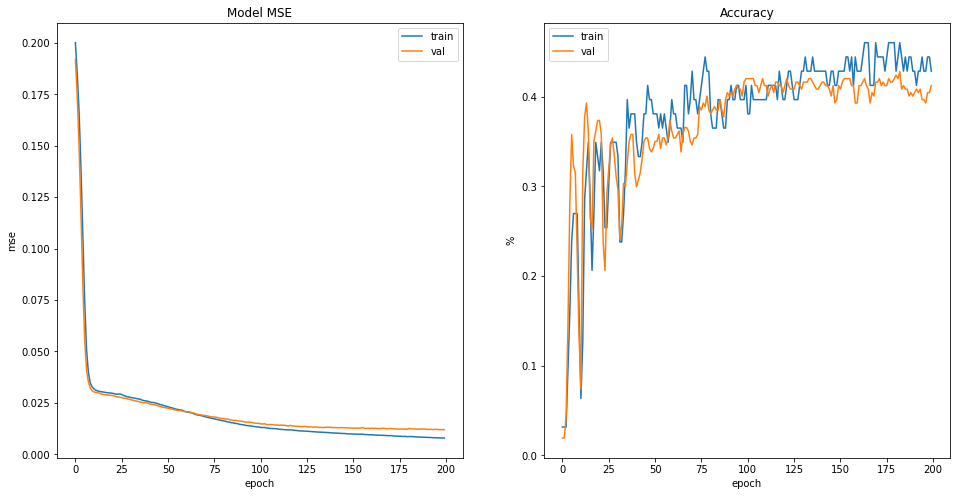

In [16]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mse'])
plt.plot(training_history.history['val_mse'])

plt.title('Model MSE')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['train', 'val'])